# Exploratory Data Analysis

- Pokazna vežba jedne uproštene analize podataka.
- Cilj 1: Dobiti intuitivni osećaj za podatke (kako izgledaju, koliko ih ima, kakve su raspodele, grafici...)
- Cilj 2: Uvideti da li i kakav *prerpocessing* korak treba uvesti
- Cilj 3: Predložiti početni model

## Zadatak i *dataset*

- Klasifikacija gojaznosti
- [link sa podacima](https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+)
- **.csv**: *Comma-separated values*

1. Otvoriti u text editoru

![gedit](figures/gedit.png)

2. Ili Excel-u

![excel](figures/excel.png)

## Pandas

- *python* biblioteka dizajnirana za analizu podataka
- Podaci su tabelarni
- Pojednostavljivanje za mnoge standardne operacije nad podacima

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Ucitavanje
df = pd.read_csv("data.csv")
df


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [4]:
# Sample
df.sample(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
911,Female,21.571288,1.600914,68.058902,yes,yes,1.766849,3.322522,Sometimes,no,2.616285,no,0.943058,0.256977,Sometimes,Public_Transportation,Overweight_Level_I
1849,Female,26.000000,1.602025,104.899348,yes,yes,3.000000,3.000000,Sometimes,no,2.613928,no,0.000000,0.553093,Sometimes,Public_Transportation,Obesity_Type_III
290,Male,16.000000,1.820000,71.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1678,Male,31.347497,1.868127,123.172214,yes,yes,2.585942,3.000000,Sometimes,no,2.302506,no,0.597863,0.111925,Sometimes,Public_Transportation,Obesity_Type_II
216,Female,23.000000,1.600000,63.000000,yes,no,3.000000,3.000000,Frequently,no,2.000000,no,3.000000,0.000000,Sometimes,Walking,Normal_Weight


In [5]:
df[["Height", "Weight"]]

,Height,Weight
0,1.620000,64.000000
1,1.520000,56.000000
2,1.800000,77.000000
3,1.800000,87.000000
4,1.780000,89.800000
...,...,...
2106,1.710730,131.408528
2107,1.748584,133.742943
2108,1.752206,133.689352
2109,1.739450,133.346641


## Obrada i analiza

- tipovi kolona
- promena tipova
- one-hot encoding

In [6]:
# Tiplovi
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [7]:
# Kategorije
df["CALC"].unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [8]:
# Poredjenja
sum(df["Height"] > 1.80)

313

<BarContainer object of 50 artists>

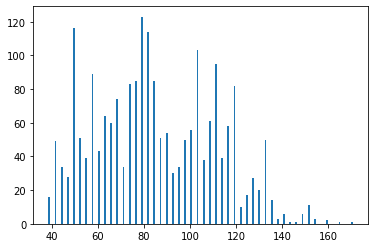

In [9]:
# Continualna
cnt, pos = np.histogram(df["Weight"], bins=50)
plt.bar(pos[:-1], cnt)

In [10]:
# Scatter
df[["Height", "Weight"]]

,Height,Weight
0,1.620000,64.000000
1,1.520000,56.000000
2,1.800000,77.000000
3,1.800000,87.000000
4,1.780000,89.800000
...,...,...
2106,1.710730,131.408528
2107,1.748584,133.742943
2108,1.752206,133.689352
2109,1.739450,133.346641


<AxesSubplot:xlabel='Height', ylabel='Weight'>

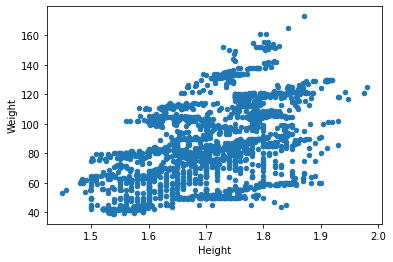

In [11]:
# Scatter
df.plot.scatter(x="Height", y="Weight")

## Cast-ovanje promenljivih
Promenljive nisu numericke pa i zelimo da ih prebacimo u takve
- yes/no -> 1/0
- kategoricke -> one-hot

In [12]:
def load_clean_data(name: str):
    df = pd.read_csv(name)
    clean_df = pd.DataFrame()

    # No need to be cleaned
    columns = ["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]
    for col in columns:
        clean_df[col] = df[col]

    # yes/no features
    columns = ["family_history_with_overweight", "FAVC", "SMOKE", "SCC"]
    for col in columns:
        clean_df[col] = df[col].map({"yes": 1, "no": 0})

    # male/female to 1/0
    clean_df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})

    # Categorical values
    columns = ["CALC", "MTRANS", "CAEC"]
    one_hots = pd.concat([pd.get_dummies(df[x], prefix=x) for x in columns], axis=1)
    clean_df = pd.concat([clean_df, one_hots], axis=1)

    # Targets values
    label_dict = {
        "Insufficient_Weight": 0,
        "Normal_Weight": 1,
        "Overweight_Level_I": 2,
        "Overweight_Level_II": 2,
        "Obesity_Type_I": 3,
        "Obesity_Type_II": 3,
        "Obesity_Type_III": 3
    }

    targets = df["NObeyesdad"].map(label_dict)


    return clean_df, targets

In [13]:
clean_df, targets = load_clean_data("data.csv")
clean_df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,family_history_with_overweight,FAVC,...,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,1,0,...,1,0,0,0,1,0,0,0,1,0
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,1,0,...,0,0,0,0,1,0,0,0,1,0
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,1,0,...,0,0,0,0,1,0,0,0,1,0
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,0,0,...,0,0,0,0,0,1,0,0,1,0
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,1,1,...,0,0,0,0,1,0,0,0,1,0
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,1,1,...,0,0,0,0,1,0,0,0,1,0
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,1,1,...,0,0,0,0,1,0,0,0,1,0
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,1,1,...,0,0,0,0,1,0,0,0,1,0


## Korelacija

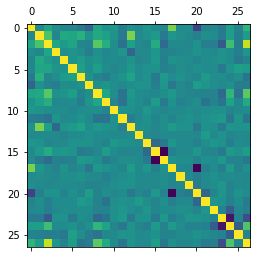

In [14]:
xy = pd.concat([clean_df, targets], axis=1)
plt.matshow(xy.corr())

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
df_train, df_test = train_test_split(df, test_size=.3)

In [20]:
df_test

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
1078,Male,29.216019,1.752265,88.096062,yes,yes,2.000000,1.894384,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
1478,Male,19.515324,1.879144,112.932984,yes,yes,2.000000,2.152733,Sometimes,no,2.533690,no,0.917563,1.285838,Sometimes,Public_Transportation,Obesity_Type_I
493,Male,20.000000,1.800000,65.000000,no,yes,2.000000,3.000000,Frequently,no,1.000000,no,2.000000,0.000000,Sometimes,Motorbike,Normal_Weight
831,Male,21.000000,1.620000,70.000000,no,yes,2.000000,1.000000,no,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_I
2024,Female,20.323767,1.774207,138.143162,yes,yes,3.000000,3.000000,Sometimes,no,2.816052,no,1.571865,0.688058,Sometimes,Public_Transportation,Obesity_Type_III
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,Male,25.136116,1.764140,113.089716,yes,yes,1.168856,3.000000,Sometimes,no,2.013205,no,1.246223,0.001590,Sometimes,Public_Transportation,Obesity_Type_II
1038,Female,34.389679,1.691322,77.561602,yes,yes,3.000000,1.802305,Sometimes,no,2.000000,no,0.390877,0.000000,no,Automobile,Overweight_Level_II
716,Male,17.203917,1.853325,59.619485,yes,yes,2.883745,3.595761,Sometimes,no,2.000000,no,2.077653,0.714701,no,Automobile,Insufficient_Weight
1276,Male,19.089595,1.700164,99.204695,yes,yes,2.000000,2.119826,Sometimes,no,2.000000,no,0.000000,1.882539,no,Public_Transportation,Obesity_Type_I
